# Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Reading Data

In [61]:
df=pd.read_excel('Downloads/iris (1).xls')

In [62]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [63]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
df.shape

(150, 5)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Findind Missing values

In [66]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [67]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

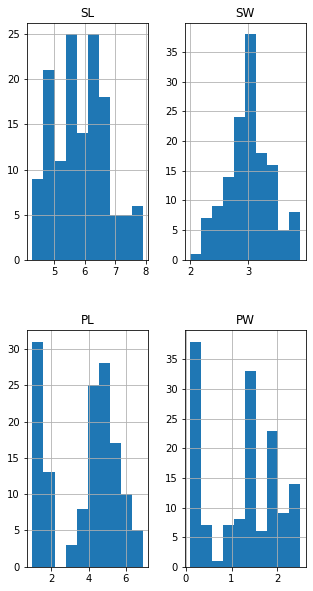

In [73]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(5,10))
plt.show()

In [74]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [75]:
df['SL']=df['SL'].fillna(df['SL'].mean())

In [76]:
df['SW']=df['SW'].fillna(df['SW'].mean())

In [77]:
df['PL']=df['PL'].fillna(df['PL'].mean())

In [78]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Finding and removing Outliers

Text(0.5, 1.0, 'boxplot of SL')

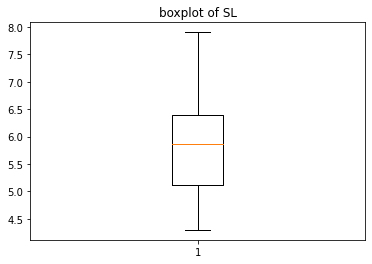

In [79]:
plt.boxplot(df['SL'])
plt.title('boxplot of SL')

Text(0.5, 1.0, 'boxplot of SW')

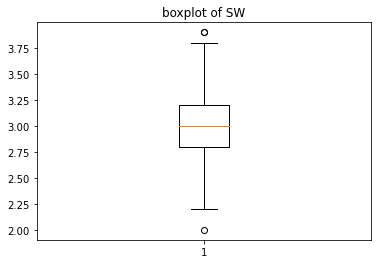

In [80]:
plt.boxplot(df['SW'])
plt.title('boxplot of SW')

In [81]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [82]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.2


In [83]:
IQR=Q3-Q1

In [84]:
IQR

0.40000000000000036

In [85]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [86]:
print(low_lim)
print(up_lim)

2.1999999999999993
3.8000000000000007


In [87]:
outlier=[]
for x in df['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [88]:
outlier

[3.9, 3.9, 2.0]

In [89]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([5, 16], dtype='int64')

In [93]:
df.drop([ 5,16],inplace=True)

Text(0.5, 1.0, 'boxplot of SW')

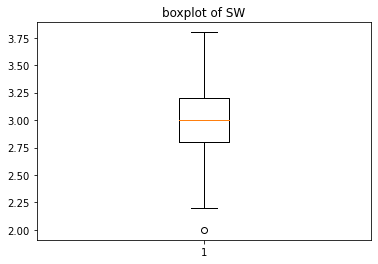

In [94]:
plt.boxplot(df['SW'])
plt.title('boxplot of SW')

Text(0.5, 1.0, 'boxplot of PL')

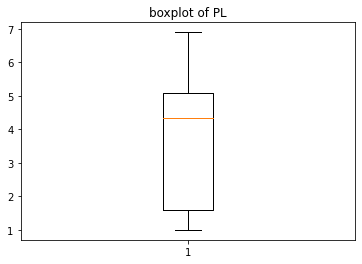

In [95]:
plt.boxplot(df['PL'])
plt.title('boxplot of PL')

Text(0.5, 1.0, 'boxplot of PW')

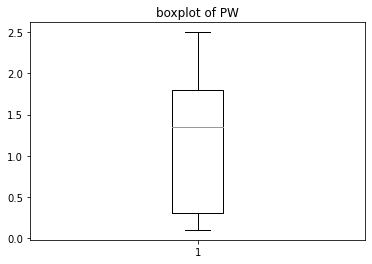

In [96]:
plt.boxplot(df['PW'])
plt.title('boxplot of PW')

In [97]:
y=df['Classification']
X=df.drop(['Classification'],axis=1)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Classification']=label_encoder.fit_transform(df['Classification'])

In [100]:
df

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.400000,0.2,0
1,4.900000,3.0,1.400000,0.2,0
2,5.864748,3.2,1.300000,0.2,0
3,4.600000,3.1,1.500000,0.2,0
4,5.000000,3.6,1.400000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.200000,2.3,2
146,6.300000,2.5,5.000000,1.9,2
147,6.500000,3.0,3.823571,2.0,2
148,6.200000,3.4,5.400000,2.3,2


In [101]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()

In [102]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
decision_tree_pred=decision_tree.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [105]:
print("Accuracy is: ",accuracy_score(y_test,decision_tree_pred,))


Accuracy is:  0.9166666666666666


In [106]:
print('Recall score is: ',recall_score(y_test,decision_tree_pred,average='micro'))
print('precision score is: ',precision_score(y_test,decision_tree_pred,average='micro'))

Recall score is:  0.9166666666666666
precision score is:  0.9166666666666666


In [107]:
from sklearn.metrics import classification_report
classification_report(y_test, decision_tree_pred)


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       0.85      0.92      0.88        12\n Iris-virginica       0.91      0.83      0.87        12\n\n       accuracy                           0.92        36\n      macro avg       0.92      0.92      0.92        36\n   weighted avg       0.92      0.92      0.92        36\n'

In [108]:
print('f1 score is:',f1_score(y_test,decision_tree_pred,average='micro'))


f1 score is: 0.9166666666666666


# create confusion matrix


In [109]:
cm=confusion_matrix(y_test,decision_tree_pred)

# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix


In [110]:
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])


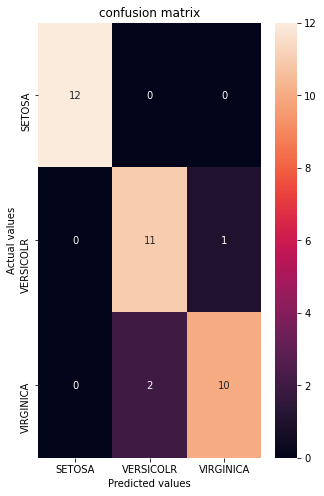

In [111]:
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
rf_tune=RandomForestClassifier(n_estimators=5, criterion='entropy',max_depth=10,min_samples_split=5)
rf_tune.fit(X_train,y_train)
rf_tune_pred=rf_tune.predict(X_test)

# let us check our model accuracy, precision, recall


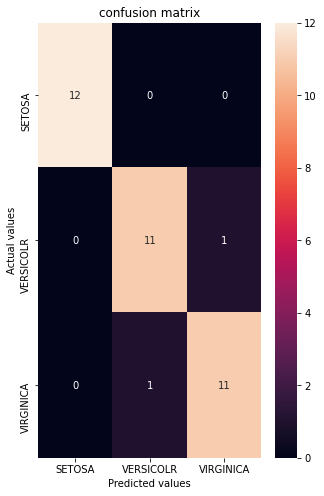

In [119]:
classification_report(y_test,rf_tune_pred)

#create confusion matrix
cm=confusion_matrix(y_test,rf_tune_pred)
# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [118]:
print('Accuracy for Random Forest is:',accuracy_score(y_test,rf_tune_pred))
print('Recall value for Random Forest is: ',recall_score(y_test,rf_tune_pred,average='weighted'))
print('precision value for Random Forest is: ',precision_score(y_test,rf_tune_pred,average='weighted'))
print('f1 score for Random Forest is: ',f1_score(y_test,rf_tune_pred,average='weighted'))


Accuracy for Random Forest is: 0.9444444444444444
Recall value for Random Forest is:  0.9444444444444444
precision value for Random Forest is:  0.9444444444444444
f1 score for Random Forest is:  0.9444444444444444


In [120]:
from sklearn.svm import SVC

In [121]:
svm_poly=SVC(kernel='poly',degree=5)

In [123]:
svm_poly.fit(X_train,y_train)


SVC(degree=5, kernel='poly')

In [126]:
svm_poly_pred=svm_poly.predict(X_test)

classification_report(y_test,svm_poly_pred)


'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       1.00      0.92      0.96        12\n Iris-virginica       0.92      1.00      0.96        12\n\n       accuracy                           0.97        36\n      macro avg       0.97      0.97      0.97        36\n   weighted avg       0.97      0.97      0.97        36\n'

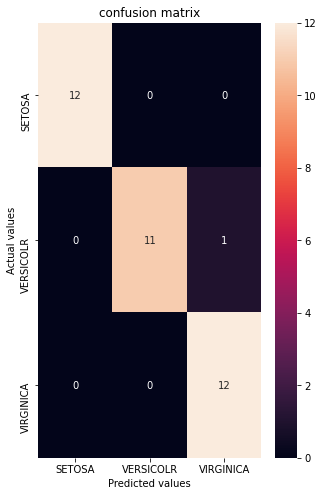

In [127]:
#create confusion matrix
cm=confusion_matrix(y_test,svm_poly_pred)
# Creating a dataframe for a array-formatted Confusion matrix, for plotting confusion matrix
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,8))
sns.heatmap(cm_df,annot=True)
plt.title('confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


In [128]:
print('Accuracy for SVM polynomial is:',accuracy_score(y_test,svm_poly_pred))
print('Recall value for SVM polynomial is: ',recall_score(y_test,svm_poly_pred,average='micro'))
print('precision value for SVM polynomial is: ',precision_score(y_test,svm_poly_pred,average='micro'))
print('f1 score for SVM polynomial is: ',f1_score(y_test,svm_poly_pred,average='micro'))

Accuracy for SVM polynomial is: 0.9722222222222222
Recall value for SVM polynomial is:  0.9722222222222222
precision value for SVM polynomial is:  0.9722222222222222
f1 score for SVM polynomial is:  0.9722222222222222


So here SVM is the good model